In [1]:
import pandas as pd

### 데이터 불러오기

In [568]:
df = pd.read_csv('../data/20211216_rainNsnow.csv',encoding = 'euc-kr',index_col=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181499 entries, 0 to 181498
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   날짜      181499 non-null  object 
 1   호선      181499 non-null  object 
 2   역번호     181499 non-null  float64
 3   역명      181499 non-null  object 
 4   요일      181499 non-null  float64
 5   인원      181499 non-null  float64
 6   기온      181499 non-null  float64
 7   강수량     181499 non-null  object 
 8   풍속      181499 non-null  float64
 9   적설      181499 non-null  object 
 10  연도      181499 non-null  int64  
 11  lat     181499 non-null  float64
 12  lng     181499 non-null  float64
 13  동       181499 non-null  object 
 14  관광지수    181499 non-null  float64
 15  사업체수    181499 non-null  float64
 16  인구수     181499 non-null  float64
 17  상권수     181499 non-null  float64
 18  비율      181499 non-null  float64
 19  혼잡      181499 non-null  int64  
 20  총인원     181499 non-null  float64
 21  new_비율  18

### 범주형 자료 변환

In [13]:
from sklearn.preprocessing import LabelEncoder
def get_labelencoder(x):
    le = LabelEncoder()
    le.fit(df[x])
    df['new'+x] = le.transform(df[x])
    return df

In [571]:
get_labelencoder('강수량')
get_labelencoder('적설')
get_labelencoder('역명')

,날짜,호선,역번호,역명,요일,인원,기온,강수량,풍속,적설,...,사업체수,인구수,상권수,비율,혼잡,총인원,new_비율,new강수량,new적설,new역명
0,2019-01-01,1호선,158.0,청량리,1.0,1576.0,-2.95,맑음,2.90,맑음,...,3182.0,51065.0,9.0,0.576690,0,4277.0,0.368483,0,3,197
1,2019-01-02,1호선,158.0,청량리,2.0,4327.0,-2.95,맑음,2.10,맑음,...,3182.0,51065.0,9.0,1.583336,0,4277.0,1.011690,0,3,197
2,2019-01-03,1호선,158.0,청량리,3.0,4304.0,-0.65,맑음,1.80,맑음,...,3182.0,51065.0,9.0,1.574920,0,4277.0,1.006313,0,3,197
3,2019-01-04,1호선,158.0,청량리,4.0,4711.0,1.90,맑음,1.25,맑음,...,3182.0,51065.0,9.0,1.723849,0,4277.0,1.101473,0,3,197
4,2019-01-05,1호선,158.0,청량리,5.0,2734.0,-1.80,맑음,1.55,맑음,...,3182.0,51065.0,9.0,1.000425,0,4277.0,0.639233,0,3,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181494,2020-12-27,4호선,426.0,서울역,6.0,489.0,7.55,맑음,1.60,맑음,...,1212.0,13622.0,4.0,0.178935,0,1433.0,0.341242,0,3,109
181495,2020-12-28,4호선,426.0,서울역,0.0,1063.0,7.70,맑음,1.60,맑음,...,1212.0,13622.0,4.0,0.388973,0,1433.0,0.741800,0,3,109
181496,2020-12-29,4호선,426.0,서울역,1.0,1150.0,-0.50,맑음,3.70,맑음,...,1212.0,13622.0,4.0,0.420808,0,1433.0,0.802512,0,3,109
181497,2020-12-30,4호선,426.0,서울역,2.0,1311.0,-10.95,맑음,4.40,맑음,...,1212.0,13622.0,4.0,0.479721,0,1433.0,0.914864,0,3,109


### 분석에 사용할 컬럼들만 선택

In [20]:
data = df[['요일','기온','풍속','new강수량','new적설','new역명','사업체수','인구수','상권수','관광지수','new_비율','혼잡']]

In [21]:
X = data.drop(['혼잡','new_비율'],axis=1)
y = data['혼잡']

# RandomForest - 모든 변수 이용

In [705]:
import warnings 
warnings.filterwarnings(action='ignore')
from matplotlib import font_manager, rc
import platform
import seaborn as sns
import matplotlib.pyplot as plt


path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    
    print("Hangul OK in your MAC !!!")
    rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows !!!")
    rc("font", family=font_name)
else:
    print("Unknown system... sorry~~~~")

plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows !!!


<AxesSubplot:xlabel='혼잡', ylabel='count'>

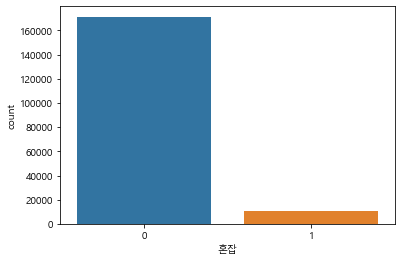

In [31]:
sns.countplot(data['혼잡'])

In [26]:
from sklearn.model_selection import train_test_split

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((116159, 10), (29040, 10), (116159,), (29040,))

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
def train(x_t,x_v,y_t,y_v):
    rf_clf = RandomForestClassifier()
    rf_clf.fit(x_t,y_t)
    pred= rf_clf.predict(x_v)

    print('acc :',accuracy_score(y_v,pred))
    print('f1 score',f1_score(y_v,pred))
    print(confusion_matrix(y_v,pred))
    
    cols = pd.Series(rf_clf.feature_importances_, index=x_t.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,10))
    sns.barplot(x=cols, y=cols.index, palette='Spectral')
    plt.show()

acc : 0.9579201101928375
f1 score 0.647228637413395
[[26697   640]
 [  582  1121]]


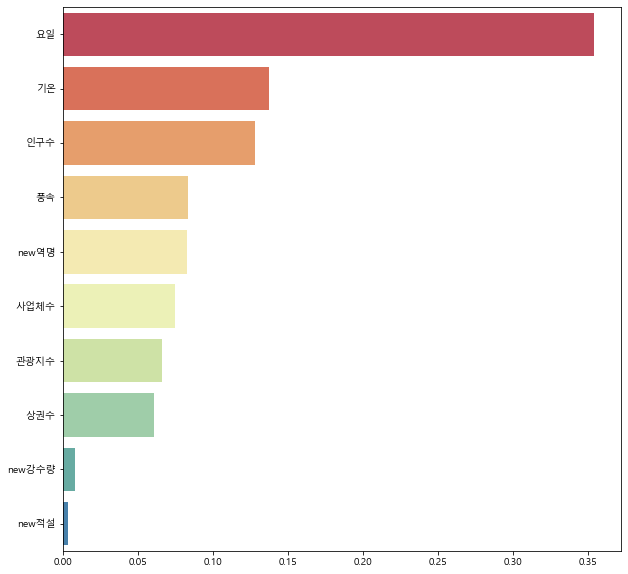

In [65]:
# upsampling 적용
train(X_train_over,X_val,y_train_over,y_val)

acc : 0.9621212121212122
f1 score 0.6185852981969486
[[27048   289]
 [  811   892]]


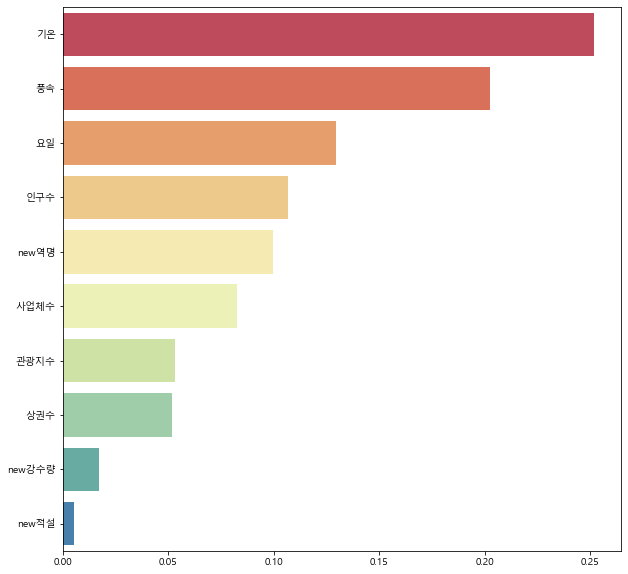

In [66]:
# upsampling 적용 안함
train(X_train,X_val,y_train,y_val)

### test데이터에 대해 얼마나 맞출까?

In [42]:
pred_test = rf_clf.predict(X_test)

In [71]:
X_test

,요일,기온,풍속,new강수량,new적설,new역명,사업체수,인구수,상권수,관광지수
144204,4.0,-1.55,3.70,0,3,137,1737.0,102288.0,17.0,1.0
136900,3.0,1.30,3.55,0,3,42,5348.0,45731.0,28.0,1.0
71537,1.0,15.80,3.65,0,3,135,3317.0,177372.0,21.0,0.0
29894,4.0,14.15,1.50,0,3,140,633.0,26221.0,8.0,0.0
15727,6.0,-0.20,3.05,0,3,186,2895.0,120780.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
25831,2.0,23.95,2.35,1,3,79,5307.0,31963.0,6.0,1.0
176725,1.0,9.05,1.05,0,3,127,2886.0,6284.0,3.0,5.0
95802,3.0,14.45,1.80,0,3,9,623.0,32407.0,0.0,0.0
136691,4.0,24.90,3.30,0,3,42,5348.0,45731.0,28.0,1.0


In [67]:
pred_test = rf_clf.predict(X_test)
wrong = X_test[y_test!=pred_test]
wrong.shape
wrong_list = wrong['new역명'].value_counts()[:10].index
# 가장 많이 틀린 역 top 10 
for x in wrong_list : 
    print(df[df['new역명']==x]['역명'].unique())

(1541, 10)

In [56]:
wrong_list = wrong['new역명'].value_counts()[:10].index

In [58]:
# 가장 많이 틀린 역 top 10 
for x in wrong_list : 
    print(df[df['new역명']==x]['역명'].unique())

['을지로4가']
['종합운동장']
['동대입구']
['한양대']
['충무로']
['종로3가']
['시청']
['한강진']
['동대문역사문화공원']
['여의나루']


# 극단적인 비율을 제거해보고 모델 평가해보기

<AxesSubplot:xlabel='new_비율'>

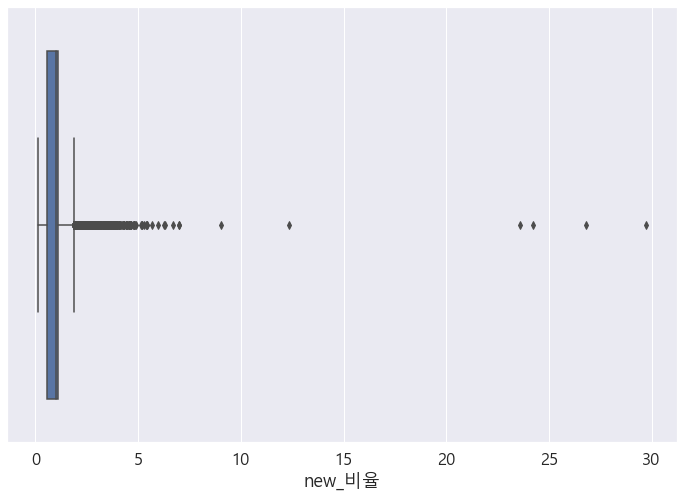

In [732]:
plt.figure(figsize=(12,8))
sns.boxplot(data['new_비율'])

## new_비율 > 5 인 데이터 제거 & 상권수,관광지수 컬럼제거 

In [130]:
cond = data[data['new_비율']<=5]
print(cond.shape)
cond.head()

(181268, 12)


,요일,기온,풍속,new강수량,new적설,new역명,사업체수,인구수,상권수,관광지수,new_비율,혼잡
0,1.0,-2.95,2.90,0,3,197,3182.0,51065.0,9.0,0.0,0.368483,0
1,2.0,-2.95,2.10,0,3,197,3182.0,51065.0,9.0,0.0,1.011690,0
2,3.0,-0.65,1.80,0,3,197,3182.0,51065.0,9.0,0.0,1.006313,0
3,4.0,1.90,1.25,0,3,197,3182.0,51065.0,9.0,0.0,1.101473,0
4,5.0,-1.80,1.55,0,3,197,3182.0,51065.0,9.0,0.0,0.639233,0


# 모든 변수 사용

In [134]:
# 강수량과 적설 제거 
X = cond[['요일','기온','new강수량','new적설','풍속','new역명','사업체수','인구수','관광지수','상권수']]
y = cond['혼잡']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape


smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

acc : 0.9557631969106644
f1 score 0.6258384368620589
[[26647   652]
 [  631  1073]]


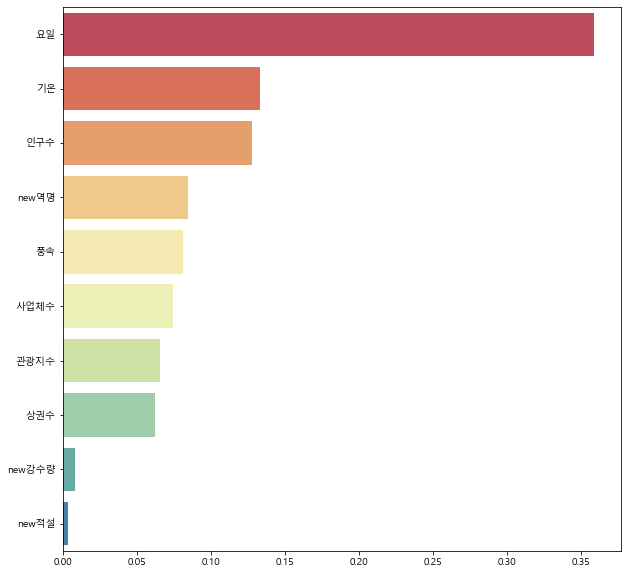

In [135]:
# upsampling 적용
train(X_train_over,X_val,y_train_over,y_val)

# new_비율 > 3 인 데이터 제거

In [140]:
cond2 = data[data['new_비율']<=3]
cond2.shape

(181127, 12)

<AxesSubplot:>

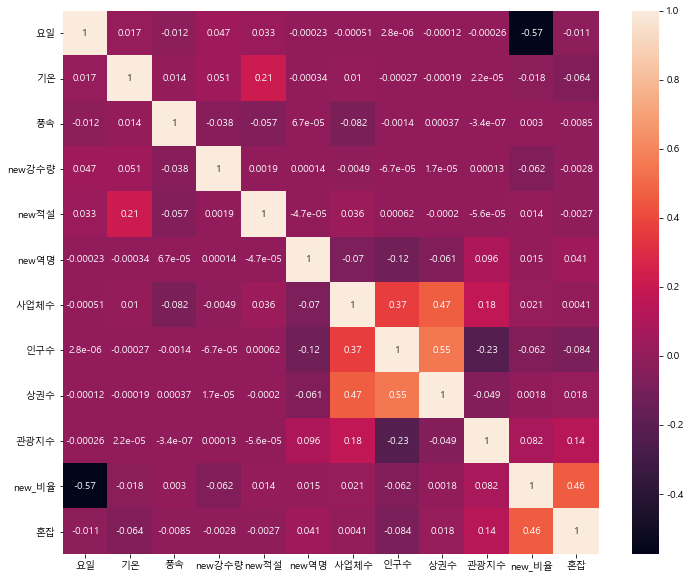

In [147]:
plt.figure(figsize=(12,10))
sns.heatmap(cond2.corr(),annot=True)

<AxesSubplot:xlabel='new_비율'>

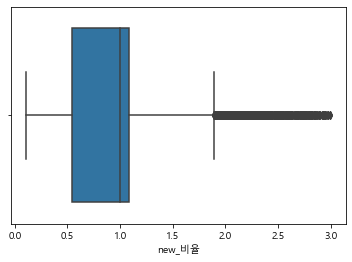

In [146]:
sns.boxplot(cond2['new_비율'])

In [141]:
# 강수량과 적설 제거 
X = cond2[['요일','기온','new강수량','new적설','풍속','new역명','사업체수','인구수','관광지수','상권수']]
y = cond2['혼잡']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape


smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

acc : 0.9587660881267037
f1 score 0.6386452978530389
[[26730   653]
 [  542  1056]]


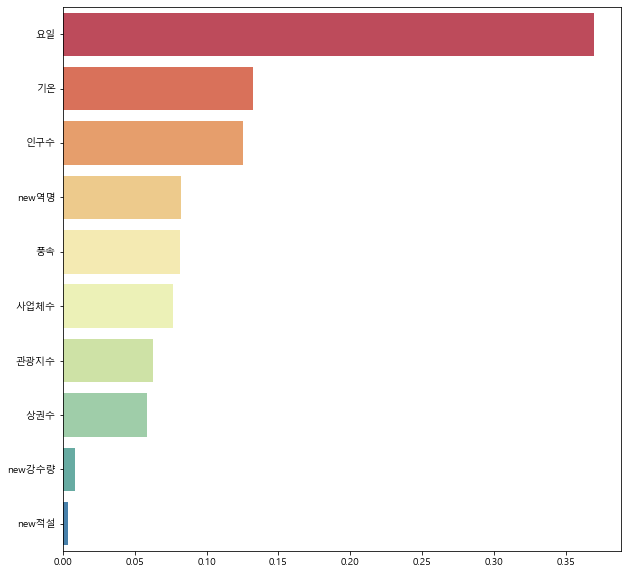

In [142]:
# upsampling 적용
train(X_train_over,X_val,y_train_over,y_val)

- new_비율이 5이상 또는 3이상인 경우를 제외해보고 모델을 돌려보았다.
- upper bounce이상인 데이터를 다 빼는 것을 고민해 보았지만 그렇게 한다면 특정 한역의 데이터가 70%정도 사라지기 때문에 임의로 new_비율 제거 기준을 3과 5를 설정하여 모델링 진행
- 그 결과 제거 하고 안하고의 차이가 없는 것으로 판단되었다. 

---

# 모델링 진행 
- 비율의 이상치를 빼지않고 모델링 진행하기로 결정 
- 분류 모델을 모두 돌리고 가장 좋은 best model을 설정하기로 하였다.
- 데이터는 scaler를 통해 정제해주기로 함
- 변수들을 선택적으로 넣어주며 꼭 필요한 변수인가를 확인

In [718]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
def get_clf_eval(y_val,pred):
    acc = accuracy_score(y_val,pred)
    pre = accuracy_score(y_val,pred)
    re = recall_score(y_val,pred)
    f1 = f1_score(y_val,pred)
    auc = roc_auc_score(y_val,pred)
    con_mat = confusion_matrix(y_val,pred)
    print(con_mat)
    return acc,pre,re,f1,auc

def get_result(model,x_t,x_v,y_t,y_v):
    model.fit(x_t,y_t)
    pred= model.predict(x_v)
    return get_clf_eval(y_val,pred)

def get_result_pd(models,model_names,X_train,X_val,y_train,y_val):
    col_names = ['acc','precision','recall','f1','roc_auc']
    tmp = []
    for model in models : 
        tmp.append(get_result(model,X_train,X_val,y_train,y_val))
    return pd.DataFrame(tmp,columns=col_names,index=model_names)

In [714]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler

estimators1 = [('Standard scaler',StandardScaler()),
             ('Decision Tree',DecisionTreeClassifier())]
estimators2 = [('Standard scaler',StandardScaler()),
             ('ada',AdaBoostClassifier())]
estimators3 = [('Standard scaler',StandardScaler()),
             ('gb_clf',GradientBoostingClassifier())]
estimators4 = [('Standard scaler',StandardScaler()),
             ('rf_clf',RandomForestClassifier())]
estimators5 = [('Standard scaler',StandardScaler()),
             ('lg_reg',LogisticRegression())]
estimators6 = [('Standard scaler',StandardScaler()),
             ('lgbm',LGBMClassifier())]

models = []
model_names = ['Decision Tree','ada','gb_clf','rf_clf','lg_reg','lgbm']
models.append(Pipeline(estimators1))
models.append(Pipeline(estimators2))
models.append(Pipeline(estimators3))
models.append(Pipeline(estimators4))
models.append(Pipeline(estimators5))
models.append(Pipeline(estimators6))
models

[Pipeline(steps=[('Standard scaler', StandardScaler()),
                 ('Decision Tree', DecisionTreeClassifier())]),
 Pipeline(steps=[('Standard scaler', StandardScaler()),
                 ('ada', AdaBoostClassifier())]),
 Pipeline(steps=[('Standard scaler', StandardScaler()),
                 ('gb_clf', GradientBoostingClassifier())]),
 Pipeline(steps=[('Standard scaler', StandardScaler()),
                 ('rf_clf', RandomForestClassifier())]),
 Pipeline(steps=[('Standard scaler', StandardScaler()),
                 ('lg_reg', LogisticRegression())]),
 Pipeline(steps=[('Standard scaler', StandardScaler()),
                 ('lgbm', LGBMClassifier())])]

# 모든 피처 적용
- best model : random forest

In [716]:
X = data[['요일','기온','new강수량','new적설','풍속','new역명','사업체수','인구수','상권수','관광지수']]
y = data['혼잡']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape


smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [719]:
# upsampling 적용함 
case1 = get_result_pd(models,model_names,X_train_over,X_val,y_train_over,y_val)
case1

[[26538   799]
 [  617  1086]]
[[23017  4320]
 [  559  1144]]
[[24365  2972]
 [  534  1169]]
[[26711   626]
 [  578  1125]]
[[18396  8941]
 [  643  1060]]
[[26228  1109]
 [  426  1277]]


,acc,precision,recall,f1,roc_auc
Decision Tree,0.951240,0.951240,0.637698,0.605351,0.804235
ada,0.831990,0.831990,0.671756,0.319241,0.756864
gb_clf,0.879270,0.879270,0.686436,0.400068,0.788859
rf_clf,0.958540,0.958540,0.660599,0.651419,0.818850
lg_reg,0.669972,0.669972,0.622431,0.181135,0.647683
lgbm,0.947142,0.947142,0.749853,0.624603,0.854643


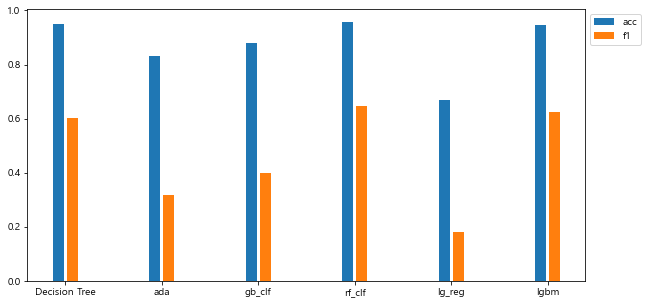

In [622]:
plt.figure(figsize=(10,5))
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(7, 1, 1, 6)
value_b_x = create_x(7, 1, 2, 6)
ax = plt.subplot()
ax.bar(value_a_x, case1['acc'])
ax.bar(value_b_x, case1['f1'])
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(case1.index)
ax.legend(labels=['acc','f1'],bbox_to_anchor=(1,1))
plt.show()


<AxesSubplot:>

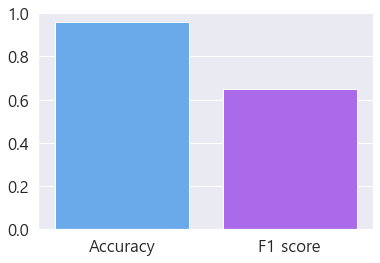

In [733]:
# Acc, F1 Visualization
name = ['Accuracy', 'F1 score']
value = [0.958540, 0.651419]
sns.barplot(x=name, y=value, palette='cool')

In [ ]:
# 피처 중요도 
models[3].steps[1][1].feature_importances_
cols = pd.Series(models[3].steps[1][1].feature_importances_, index=X_train_over.columns).sort_values(ascending=False)
plt.figure(figsize=(6,8))
sns.barplot(x=cols, y=cols.index, palette='Spectral')
plt.show()

# 적설량 강수량 제외 
- best model : random forest

In [721]:
X = data[['요일','기온','풍속','new역명','사업체수','인구수','상권수','관광지수']]
y = data['혼잡']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape


smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [722]:
# upsampling 적용함 
case2 = get_result_pd(models,model_names,X_train_over,X_val,y_train_over,y_val)
case2

[[26545   792]
 [  636  1067]]
[[23104  4233]
 [  517  1186]]
[[24433  2904]
 [  534  1169]]
[[26609   728]
 [  568  1135]]
[[18579  8758]
 [  627  1076]]
[[26257  1080]
 [  436  1267]]


,acc,precision,recall,f1,roc_auc
Decision Tree,0.950826,0.950826,0.626541,0.599102,0.798785
ada,0.836433,0.836433,0.696418,0.333053,0.770787
gb_clf,0.881612,0.881612,0.686436,0.404778,0.790103
rf_clf,0.955372,0.955372,0.666471,0.636568,0.819920
lg_reg,0.676825,0.676825,0.631826,0.186530,0.655727
lgbm,0.947796,0.947796,0.743981,0.625679,0.852237


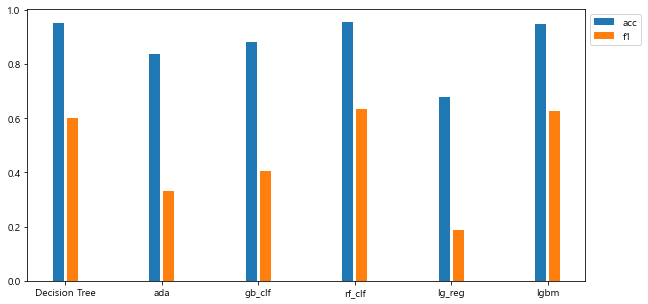

In [625]:
plt.figure(figsize=(10,5))
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(7, 1, 1, 6)
value_b_x = create_x(7, 1, 2, 6)
ax = plt.subplot()
ax.bar(value_a_x, case2['acc'])
ax.bar(value_b_x, case2['f1'])
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(case2.index)
ax.legend(labels=['acc','f1'],bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:>

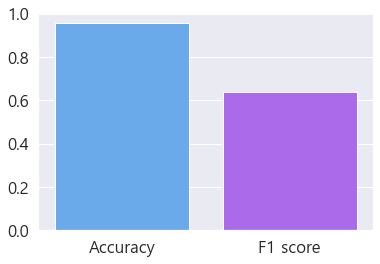

In [734]:
# Acc, F1 Visualization
name = ['Accuracy', 'F1 score']
value = [0.955372, 0.636568]
sns.barplot(x=name, y=value, palette='cool')

In [ ]:
# 피처 중요도 
models[3].steps[1][1].feature_importances_
cols = pd.Series(models[3].steps[1][1].feature_importances_, index=X_train_over.columns).sort_values(ascending=False)
plt.figure(figsize=(6,8))
sns.barplot(x=cols, y=cols.index, palette='Spectral')
plt.show()

# 상권수 , 관광지수 제외 
- best model : random forest

In [723]:
X = data[['요일','기온','new강수량','new적설','풍속','new역명','사업체수','인구수']]
y = data['혼잡']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape


smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [724]:
# upsampling 적용함 
case3 = get_result_pd(models,model_names,X_train_over,X_val,y_train_over,y_val)
case3

[[26560   777]
 [  637  1066]]
[[23183  4154]
 [  608  1095]]
[[24091  3246]
 [  565  1138]]
[[26778   559]
 [  596  1107]]
[[15852 11485]
 [  657  1046]]
[[26263  1074]
 [  424  1279]]


,acc,precision,recall,f1,roc_auc
Decision Tree,0.951309,0.951309,0.625954,0.601241,0.798766
ada,0.836019,0.836019,0.642983,0.315017,0.745514
gb_clf,0.868767,0.868767,0.668233,0.373912,0.774746
rf_clf,0.960227,0.960227,0.650029,0.657168,0.814790
lg_reg,0.581887,0.581887,0.614210,0.146972,0.597042
lgbm,0.948416,0.948416,0.751028,0.630671,0.855870


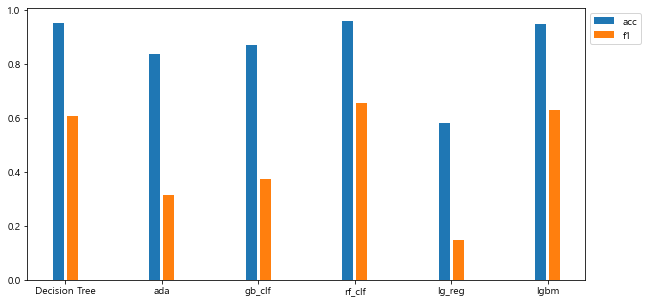

In [628]:
plt.figure(figsize=(10,5))
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(7, 1, 1, 6)
value_b_x = create_x(7, 1, 2, 6)
ax = plt.subplot()
ax.bar(value_a_x, case3['acc'])
ax.bar(value_b_x, case3['f1'])
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(case3.index)
ax.legend(labels=['acc','f1'],bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:>

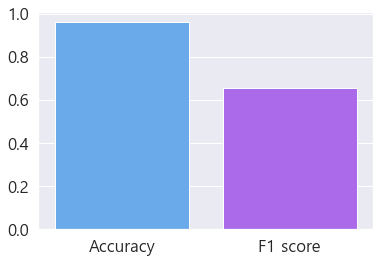

In [735]:
# Acc, F1 Visualization
name = ['Accuracy', 'F1 score']
value = [0.960227, 0.657168]
sns.barplot(x=name, y=value, palette='cool')

In [ ]:
# 피처 중요도 
models[3].steps[1][1].feature_importances_
cols = pd.Series(models[3].steps[1][1].feature_importances_, index=X_train_over.columns).sort_values(ascending=False)
plt.figure(figsize=(6,8))
sns.barplot(x=cols, y=cols.index, palette='Spectral')
plt.show()

# 요일 제외 - 주기성 데이터 제외
- best model : lgbm

In [725]:
X = data[['기온','new강수량','new적설','풍속','new역명','사업체수','인구수','상권수','관광지수']]
y = data['혼잡']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape


smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [726]:
# upsampling 적용함 
case4 = get_result_pd(models,model_names,X_train_over,X_val,y_train_over,y_val)
case4

[[25374  1963]
 [  688  1015]]
[[20043  7294]
 [  502  1201]]
[[21320  6017]
 [  384  1319]]
[[24827  2510]
 [  726   977]]
[[18400  8937]
 [  643  1060]]
[[25617  1720]
 [  642  1061]]


,acc,precision,recall,f1,roc_auc
Decision Tree,0.908712,0.908712,0.596007,0.433668,0.762100
ada,0.731543,0.731543,0.705226,0.235536,0.719204
gb_clf,0.779580,0.779580,0.774516,0.291846,0.777205
rf_clf,0.888567,0.888567,0.573693,0.376493,0.740938
lg_reg,0.670110,0.670110,0.622431,0.181197,0.647756
lgbm,0.918664,0.918664,0.623018,0.473238,0.780050


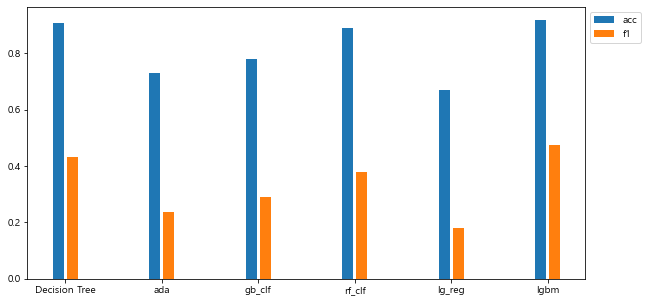

In [631]:
plt.figure(figsize=(10,5))
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(7, 1, 1, 6)
value_b_x = create_x(7, 1, 2, 6)
ax = plt.subplot()
ax.bar(value_a_x, case4['acc'])
ax.bar(value_b_x, case4['f1'])
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(case4.index)
ax.legend(labels=['acc','f1'],bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:>

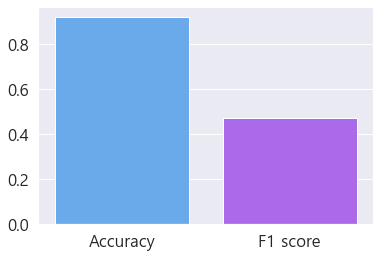

In [750]:
# Acc, F1 Visualization
name = ['Accuracy', 'F1 score']
value = [0.918664, 0.473238]
sns.barplot(x=name, y=value, palette='cool')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

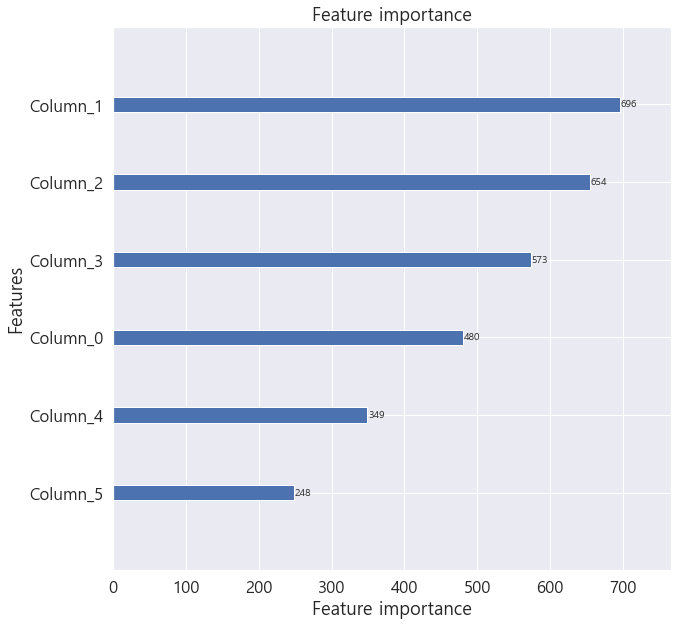

In [737]:
# 피처 중요도 
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(models[5].steps[1][1], ax=ax.i)

# 날씨 데이터 제외  - 매일 변하는 데이터
- best model : random forest

In [727]:
X = data[['요일','new역명','사업체수','인구수','상권수','관광지수']]
y = data['혼잡']

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# train, test , validation set으로 나누기 
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13,shuffle=True)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=13)
X_train.shape,X_val.shape,y_train.shape,y_val.shape


smote = SMOTE(random_state=13)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

In [728]:
# upsampling 적용함 
case5 = get_result_pd(models,model_names,X_train_over,X_val,y_train_over,y_val)
case5

[[24276  3061]
 [  343  1360]]
[[21161  6176]
 [  382  1321]]
[[22435  4902]
 [  317  1386]]
[[24253  3084]
 [  341  1362]]
[[18999  8338]
 [  666  1037]]
[[24087  3250]
 [  286  1417]]


,acc,precision,recall,f1,roc_auc
Decision Tree,0.882782,0.882782,0.798591,0.444154,0.843309
ada,0.774174,0.774174,0.775690,0.287174,0.774885
gb_clf,0.820282,0.820282,0.813858,0.346890,0.817270
rf_clf,0.882059,0.882059,0.799765,0.442999,0.843475
lg_reg,0.689945,0.689945,0.608925,0.187218,0.651959
lgbm,0.878237,0.878237,0.832061,0.444898,0.856587


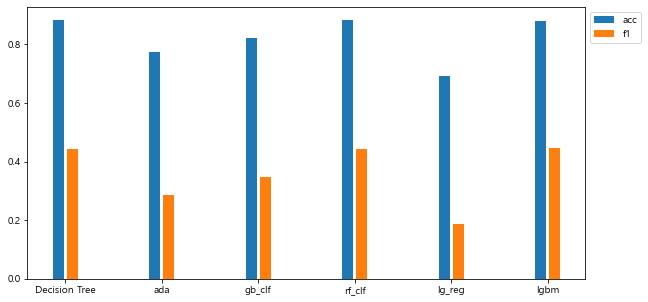

In [634]:
plt.figure(figsize=(10,5))
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(7, 1, 1, 6)
value_b_x = create_x(7, 1, 2, 6)
ax = plt.subplot()
ax.bar(value_a_x, case5['acc'])
ax.bar(value_b_x, case5['f1'])
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(case5.index)
ax.legend(labels=['acc','f1'],bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:>

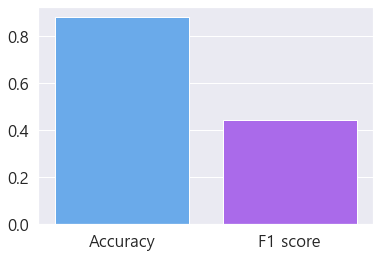

In [751]:
# Acc, F1 Visualization
name = ['Accuracy', 'F1 score']
value = [0.882059, 0.442999]
sns.barplot(x=name, y=value, palette='cool')

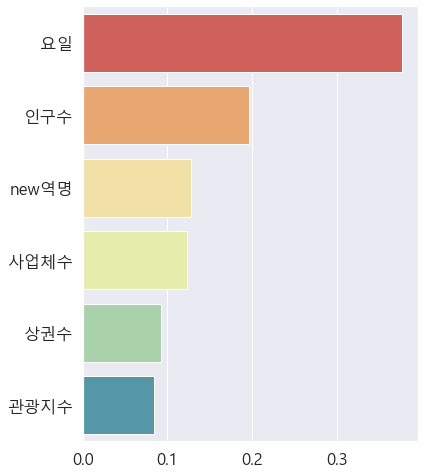

In [749]:
# 피처 중요도 
models[3].steps[1][1].feature_importances_
cols = pd.Series(models[3].steps[1][1].feature_importances_, index=X_train_over.columns).sort_values(ascending=False)
plt.figure(figsize=(6,8))
sns.barplot(x=cols, y=cols.index, palette='Spectral')
plt.show()

---

# 최종 모델 선택
- case1과 case3 비교시 모든 변수를 다 넣지 않았을 때 acc 가 0.002, f1 score가 0.007정도 상승하였다.
- 즉 관광지수와 상권수가 모델의 성능을 오히려 저하할 수도 있다는 판단을 내렸다. 
- 그에따라 case3의 피처들과 랜덤포레스트 모델을 최종적으로 선택

## 최종 모델로 test데이터를 얼마나 맞추는지 확인

In [753]:
X_test.shape

(36300, 6)

In [174]:
pred_test = Pipeline(estimators4).predict(X_test)
wrong = X_test[y_test!=pred_test]
print(wrong.shape)
wrong_list = wrong['new역명'].value_counts()[:10].index
# 가장 많이 틀린 역 top 10 
for x in wrong_list : 
    print(df[df['new역명']==x]['역명'].unique())

(1440, 8)
['을지로4가']
['동대문역사문화공원']
['동대입구']
['종합운동장']
['한양대']
['시청']
['한강진']
['종로3가']
['여의나루']
['충무로']


<AxesSubplot:xlabel='요일', ylabel='count'>

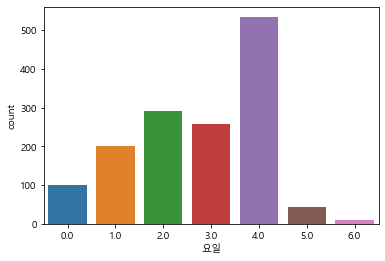

In [177]:
sns.countplot(wrong['요일'])

<AxesSubplot:ylabel='new역명'>

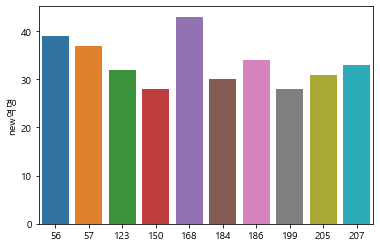

In [191]:
sns.barplot(x=wrong_list[:10].index,y=wrong_list[:10])

---

### 모델의 서비스화를 위해 2021년 최신 인구 데이터 정보 가져옴
- 이전데이터와 같은 형식으로 전처리 진행

In [432]:
# 2021년데이터 
people2021 = pd.read_excel('../data/2021년 인구수.xls',header=0,usecols="A,B,C,D,E")
people2021 = people2021[3:].reset_index().drop(['index','기간'],axis=1)
people2021['address'] = people2021['자치구']+people2021['동']
people2021 = people2021[people2021['구분']=='계']
p = people2021[['address','계']]


In [440]:
from collections import defaultdict
mar = people2021['address'].unique()


digit_gu = []
dic = defaultdict(list)
for x in mar: 
        c=x.find('가')
        #d=x[-1].indx()
        if c!=-1 and x[c-1].isdigit():
            digit_gu.append(x)
            dic[x[:c-1]+'동'].append(x)
        elif x[-2].isdigit():
            digit_gu.append(x)
            dic[x[:-2]+'동'].append(x)


dic['성동구금호동'].append('성동구금호2.3가동')
del dic['성동구금호2.동']
dic['종로구종로동'].append('종로구종로5·6가동')
dic['종로구종로동'].append('종로구종로1.2.3.4가동')
del dic['종로구종로1.2.3.동']
del dic['종로구종로5·동']
dic['중랑구면목동'].append('중랑구면목3.8동')
del dic['중랑구면목3.동']
dic['노원구상계동'].append('노원구상계10동')
dic['노원구상계동'].append('노원구상계3.4동')
dic['노원구상계동'].append('노원구상계6.7동')
dic['노원구중계동'].append('노원구중계2.3동')
del dic['노원구상계1동']
del dic['노원구상계3.동']
del dic['노원구상계6.동']
del dic['노원구중계2.동']

dic

record_store_transpose = p.set_index('address').T

for parent in dic:
    if parent not in record_store_transpose.columns:
        record_store_transpose[parent]=0
    baby = dic[parent]
    print(baby)
    record_store_transpose[parent] = record_store_transpose[baby].sum(axis=1)
    record_store_transpose.drop(columns=baby, inplace=True)


record_store_transpose

['종로구창신1동', '종로구창신2동', '종로구창신3동']
['종로구숭인1동', '종로구숭인2동']
['중구신당5동']
['용산구용산2가동']
['용산구원효로2동', '용산구원효로1동']
['용산구이촌1동', '용산구이촌2동']
['용산구이태원1동', '용산구이태원2동']
['성동구왕십리2동']
['성동구행당1동', '성동구행당2동']
['성동구금호1가동', '성동구금호4가동', '성동구금호2.3가동']
['성동구성수1가1동', '성동구성수1가2동', '성동구성수2가1동', '성동구성수2가3동']
['광진구중곡1동', '광진구중곡2동', '광진구중곡3동', '광진구중곡4동']
['광진구구의1동', '광진구구의2동', '광진구구의3동']
['광진구자양1동', '광진구자양2동', '광진구자양3동', '광진구자양4동']
['동대문구휘경1동', '동대문구휘경2동']
['동대문구전농1동', '동대문구전농2동']
['동대문구답십리2동', '동대문구답십리1동']
['동대문구장안1동', '동대문구장안2동']
['동대문구이문1동', '동대문구이문2동']
['중랑구면목2동', '중랑구면목4동', '중랑구면목5동', '중랑구면목7동', '중랑구면목3.8동']
['중랑구상봉1동', '중랑구상봉2동']
['중랑구중화1동', '중랑구중화2동']
['중랑구묵1동', '중랑구묵2동']
['중랑구망우3동']
['중랑구신내1동', '중랑구신내2동']
['성북구돈암1동', '성북구돈암2동']
['성북구정릉1동', '성북구정릉2동', '성북구정릉3동', '성북구정릉4동']
['성북구길음1동', '성북구길음2동']
['성북구월곡1동', '성북구월곡2동']
['성북구장위1동', '성북구장위2동', '성북구장위3동']
['강북구번1동', '강북구번2동', '강북구번3동']
['강북구수유1동', '강북구수유2동', '강북구수유3동']
['도봉구쌍문1동', '도봉구쌍문2동', '도봉구쌍문3동', '도봉구쌍문4동']
['도봉구방학1동', '도봉구방학2동', '도봉구방학3동']
['도봉구창1동', '도봉구

address,종로구소계,종로구사직동,종로구삼청동,종로구부암동,종로구평창동,종로구무악동,종로구교남동,종로구가회동,종로구이화동,종로구청운효자동,...,송파구문정동,송파구잠실동,강동구명일동,강동구고덕동,강동구암사동,강동구천호동,강동구성내동,강동구둔촌동,강동구상일동,종로구종로동
계,154318,9645,2764,9852,18336,8334,10229,4259,7774,12220,...,49445,117670,43486,47458,68120,87969,68097,24992,49128,13929


In [443]:
people2021 = record_store_transpose.T.reset_index()
people2021[people2021['address'].str.contains('송파구')]

,address,계
159,송파구소계,664996
160,송파구오륜동,18087
161,송파구오금동,38936
162,송파구석촌동,32344
163,송파구삼전동,30921
164,송파구가락본동,26740
165,송파구잠실본동,28604
166,송파구장지동,29540
167,송파구위례동,36877
254,송파구풍납동,38873


In [450]:
train=pd.read_csv('../data/station_new_dong.csv',encoding='euc-kr')
train = train[['선명','역명','지번주소(new)','gu']]
train.rename(columns={'지번주소(new)':'address'},inplace=True)

In [467]:
people_now = pd.merge(train,people2021,on='address',how='left')

In [469]:
word = people_now[people_now['계'].isna()]['역명'].unique()
for x in word : 
    val=train[train['역명']==x]['gu'].unique()[0]
    r=people_now[people_now['address'].str.contains(val)]['계'].median()
    people_now.loc[(people_now['역명']==x)&(people_now['계'].isna()),'계']=r
people_now

,선명,역명,address,gu,계
0,1호선,도봉산,도봉구도봉동,도봉구,48367.0
1,1호선,도봉,도봉구도봉동,도봉구,48367.0
2,1호선,방학,도봉구방학동,도봉구,76264.0
3,1호선,창동,도봉구창동,도봉구,120047.0
4,1호선,녹천,도봉구창동,도봉구,120047.0
...,...,...,...,...,...
273,8호선,송파,송파구가락동,송파구,60068.0
274,8호선,가락시장,송파구가락동,송파구,60068.0
275,8호선,문정,송파구문정동,송파구,49445.0
276,8호선,장지,송파구장지동,송파구,29540.0


In [610]:
people_now.to_csv('../data/2021서울인구수데이터.csv',encoding='euc-kr')

---

In [752]:
visit = pd.read_csv('../data/test.csv',encoding='euc-kr',index_col=0)

# 지금 이 역이 혼잡해?

In [655]:
def get_congestion(day,temp,rain,snow,wind,station,hosun):
    train_label = df[df['역명']==station]['new역명'].unique()[0]
    
    company = df[(df['역명']==station)&(df['호선']==hosun)]['사업체수'].unique()[-1]
    
    p2m = visit[(visit['subway_station_nm']==station) & (visit['선명']==hosun)]['tourist_nm'].unique()

    people = people_now[(people_now['역명']==station) & (people_now['선명']==hosun)]['계'].unique()[0]
    
    final_model = Pipeline(estimators4)
    
    
    place = [day,temp,rain,snow,wind,train_label,company,people]
    
    result = final_model.predict_proba([place])
    if len(p2m):
        print(station + '인근 관광지는 아래와 같습니다.')
        print(p2m)
        print()
    else : 
        print(station + '인근 관광지는 없습니다.')
    res = round(result[0][1]*100,2)
    return station+'(이)가 혼잡할 확률은 '+str(res)+'% 입니다.'

### 요일, 기온 , 강수량 , 적설, 풍속, 역명, 호선 정보 입력

In [640]:
get_congestion(0, 1, 0, 0 , 5, '종로3가','3호선')

종로3가인근 관광지는 아래와 같습니다.
['권동진집터' '권오설아지트터(6.10만세운동추진거점)' '낙원떡, 악기상가' '단성사' '대관원터' '무산자동맹회회관터'
 '박물관은살아있다 인사동점' '보신각앞3.1운동만세시위지,한성정부선포지' '승동교회' '신간회창립본부터' '연강홀' '오세창집터'
 '운현궁' '을지로노가리골목' '이벽집터' '전태일기념관' '전협집터(대동단거점)' '조선교육협회회관터' '조선여성동우회회관터'
 '종로3가보쌈골목' '종로귀금속거리' '종묘' '종묘외대문' '창덕궁' '최시형순교지' '탑골공원'
 '파조교(6.10독립만세선창지)' '한양의원터']



'종로3가가 혼잡할 확률은 86.0% 입니다.'

In [608]:
get_congestion(1, 9, 0, 0 , 2, '강남','2호선')

강남인근 관광지는 아래와 같습니다.
['국기원기념관']



'강남가 혼잡할 확률은 24.0% 입니다.'

In [653]:
get_congestion(2, 9, 0, 0 , 2, '불광','3호선')

불광인근 관광지는 없습니다.


'불광(이)가 혼잡할 확률은 9.0% 입니다.'

In [646]:
get_congestion(3, 3, 0, 0 , 10, '온수','7호선')

온수인근 관광지는 아래와 같습니다.
['푸른수목원']



'온수가 혼잡할 확률은 15.0% 입니다.'

In [641]:
get_congestion(4, -4, 0, 0 , 7, '뚝섬','2호선')

뚝섬인근 관광지는 아래와 같습니다.
['브릭캠퍼스 서울' '서울숲']



'뚝섬가 혼잡할 확률은 41.0% 입니다.'

In [647]:
get_congestion(5, -11, 0, 0 , 11, '혜화','4호선')

혜화인근 관광지는 아래와 같습니다.
['국립서울과학관' '대학로 예술의 거리' '문예회관' '서울문묘' '이화마을' '짚, 풀 생활사 박물관' '창경궁']



'혜화가 혼잡할 확률은 12.0% 입니다.'

In [649]:
get_congestion(6, 3, 1.2, 0 , 2, '종각','1호선')

종각인근 관광지는 아래와 같습니다.
['관광안내전시관' '놀이똥산 서울점' '런닝맨 인사동점' '보신각' '영풍문고' '조계사']



'종각가 혼잡할 확률은 13.0% 입니다.'

In [656]:
get_congestion(2, 30, 1.8, 0 , 4, '망원','6호선')

망원인근 관광지는 아래와 같습니다.
['망리단길' '망원 한강공원' '망원시장' '망원정터' '서교동최규하대통령가옥' '서울함 공원' '월드컵시장' '한강시민공원'
 '한강시민공원 망원지구 수영장']



'망원(이)가 혼잡할 확률은 14.0% 입니다.'

In [657]:
get_congestion(5, 27, 1, 0 , 2, '경복궁','3호선')

경복궁인근 관광지는 아래와 같습니다.
['경복궁' '경찰박물관' '국립민속박물관' '사직단' '서촌마을' '성곡미술관' '이상의집' '청와대사랑채']



'경복궁(이)가 혼잡할 확률은 7.0% 입니다.'

---